# 決策樹（Decision Tree）

決策樹是一種常用的機器學習算法，主要用於分類和回歸問題。它通過樹狀結構來對數據進行分割，最終做出預測。決策樹的每一個節點代表一個特徵的判斷條件，而葉節點則對應到一個預測結果。

## 構建過程

1. **選擇最佳特徵**  
   根據某種準則（如信息增益、基尼指數等），選擇最能區分數據的特徵作為當前節點的分割條件。

2. **分割數據**  
   根據選擇的特徵將數據分割成不同的子集。

3. **遞歸建樹**  
   對每個子集重複以上過程，直到達成停止條件（如樹的深度過大、數據無法再分割等）。

## 優點

- **直觀且易於理解**：模型結構簡單，易於解釋，使用者可以輕鬆理解其運作原理。
- **結果可視化**：分析結果可以以圖形化方式呈現，使得數據洞察更加直觀。
- **無需大量數據預處理**：對數據的要求較低，無需過多的清理或處理即可進行有效分析。
- **能夠處理缺失值**：具備內建的機制，可自動處理缺失值，避免數據不完整對結果的影響。
- **能夠處理非線性關係**：模型能夠捕捉並學習數據中複雜的非線性關係，提升預測準確性。
- **決策速度快**：運行效率高，能夠在短時間內給出決策結果，適用於實時應用場景。

## 缺點

- **容易過擬合**：決策樹容易在訓練數據上過擬合，特別是當樹的深度過大時，可能會對噪聲數據過度擬合，導致泛化能力差。
- **對小變動敏感**：決策樹對訓練數據中的小變動比較敏感，這可能導致樹結構不穩定，影響預測效果。
- **無法捕捉複雜的非線性關係**：雖然決策樹能夠處理非線性關係，但對於一些極其複雜的非線性模式，仍可能無法有效捕捉。
- **可能存在偏向**：決策樹在處理不平衡數據集時，可能會偏向於樣本較多的類別，影響預測的公平性。
- **計算成本高**：在樹的深度和節點數量較多時，決策樹的計算成本會顯著增加，導致運行速度較慢。
- **對連續特徵的處理較為粗略**：決策樹將連續特徵離散化來進行劃分，這種方法有時會導致信息的損失。


## 應用

決策樹廣泛應用於：
- 醫療診斷
- 金融風險預測
- 客戶分類
- 市場營銷策略

## 參考資料
* Python Data Science Handbook, Jake VanderPlas
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron


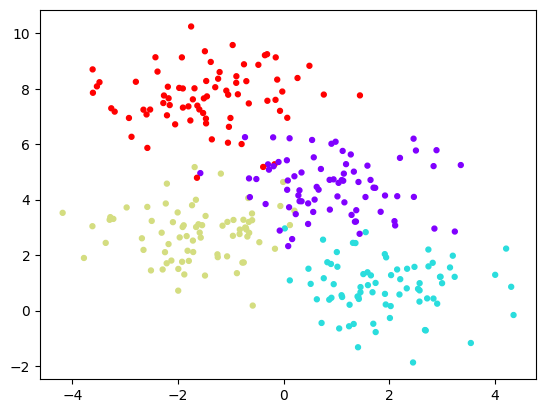

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 產生範例資料
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

# 畫出點分布圖
# 參數可以參考 https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow', marker ='.')

In [3]:
#建立決策樹的模組物件並用上面產生的資料來訓練
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [4]:
# 用來將訓練好的決策樹物件視覺化
# 只是為了方便後面示範決策樹的特性，可以不用管裡面的程式碼
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, marker ='.',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

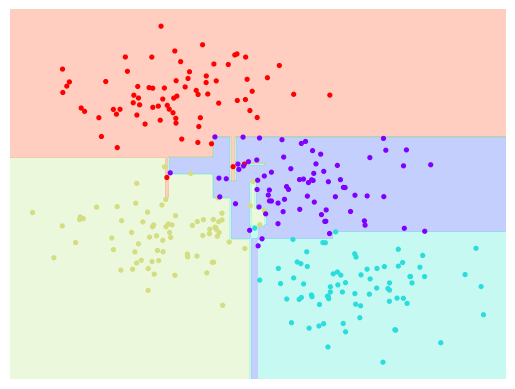

In [5]:
# 畫出決策樹的訓練結果
visualize_classifier(DecisionTreeClassifier(min_samples_split=2), X, y)

## Overfit
當決策樹的分類深度太深時會有過度學習的問題

### 採用深度限制

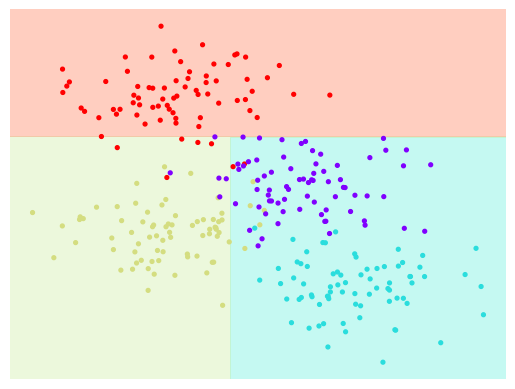

In [5]:
visualize_classifier(DecisionTreeClassifier(max_depth=2), X, y)

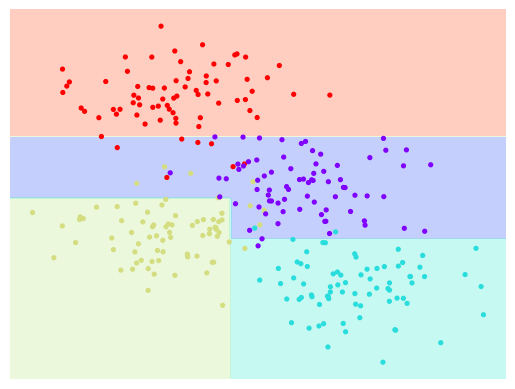

In [6]:
visualize_classifier(DecisionTreeClassifier(max_depth=3), X, y)

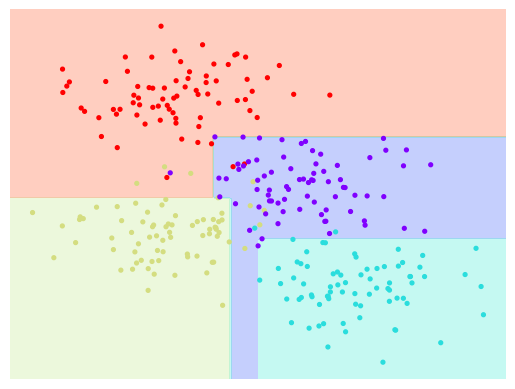

In [7]:
visualize_classifier(DecisionTreeClassifier(max_depth=4), X, y)

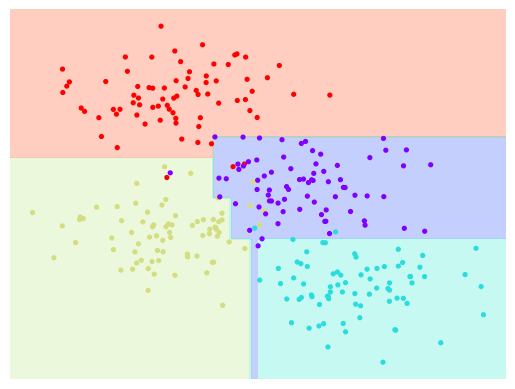

In [8]:
visualize_classifier(DecisionTreeClassifier(max_depth=5), X, y)

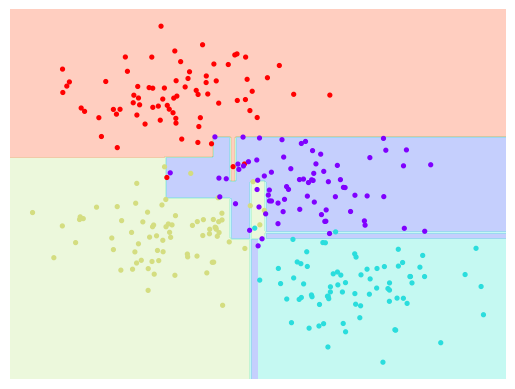

In [9]:
visualize_classifier(DecisionTreeClassifier(max_depth=6), X, y)

## 使用多個決策樹
下面這兩張圖是將訓練資料分成兩半，各自訓練一半的結果：
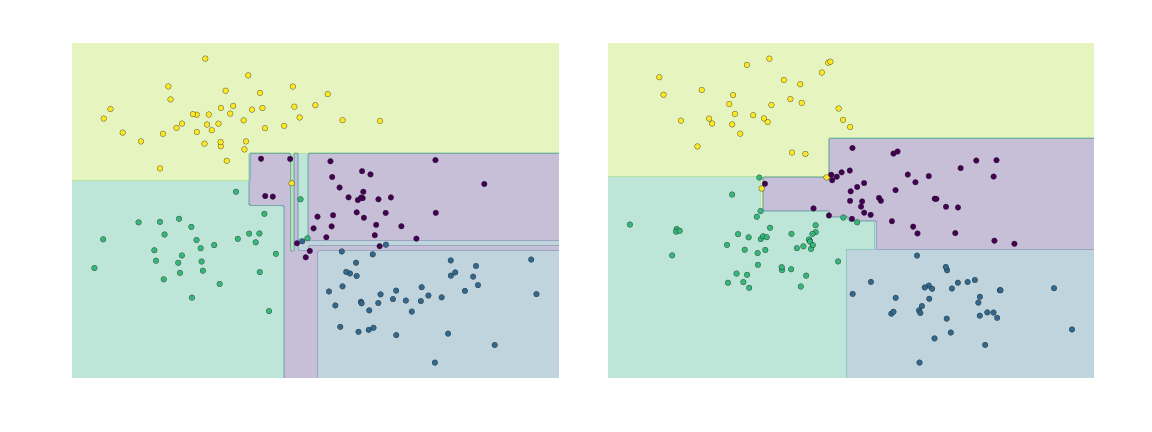
雖然一個決策樹容易有過度學習的問題，但是如果分別訓練兩個決策樹然後共同去做決策，可以減輕過度學習的問題。

## BaggingClassifier
BaggingClassifier可以重複建立許多同樣的分類器，但是每個分類器只隨機取部分的資料來訓練。最終一起進行決策。

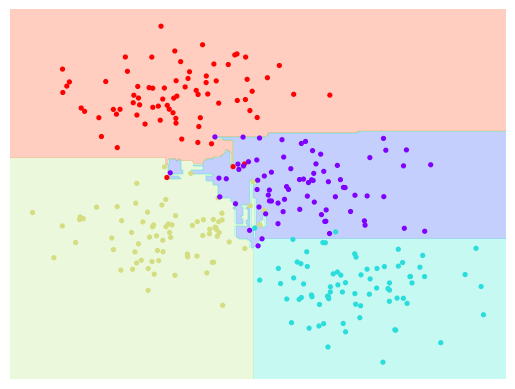

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

## Random-Forests
隨機生成樹即為決策樹的Bagging版本

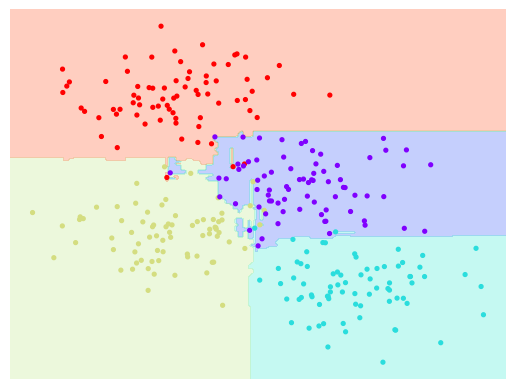

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
visualize_classifier(model, X, y);

## RandomForestRegressor
回歸版本的隨機生成樹

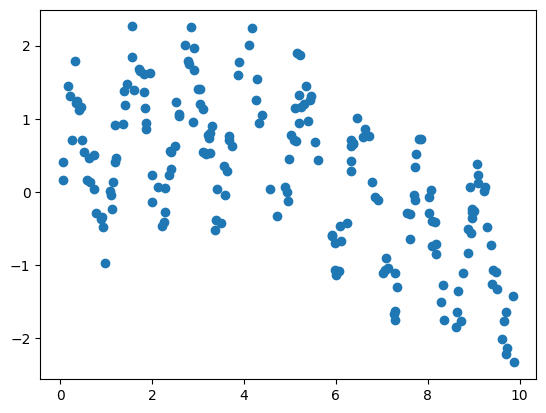

In [10]:
# 產生一個震盪起伏很大的回歸測試資料
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
# plt.errorbar(x, y, 0.3, fmt='o');
plt.scatter(x, y)

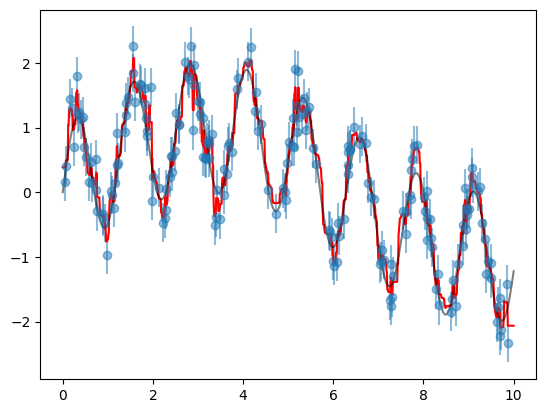

In [13]:
# 使用 RandomForestRegressor 的訓練結果
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

# 範例

## Iris

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = pd.read_csv("data/Iris.csv")

train, test = train_test_split(iris, test_size = 0.3, random_state=0)

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train['Species'] # output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test['Species']   #output value of test data

model = DecisionTreeClassifier()

model.fit(train_X,train_y) #訓練模組

prediction = model.predict(test_X) #使用訓練好的模組來測試
print('The accuracy is:', metrics.accuracy_score(prediction,test_y))

The accuracy is: 0.9777777777777777


### 查看決策樹內部數值

In [13]:
# 輸入欄位名稱
model.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [14]:
# 輸出類別名稱
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# 輸入欄位的重要性
model.feature_importances_

array([0.        , 0.04300928, 0.90006666, 0.05692405])

### 決策樹可視覺化

In [3]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: Iris-virginica



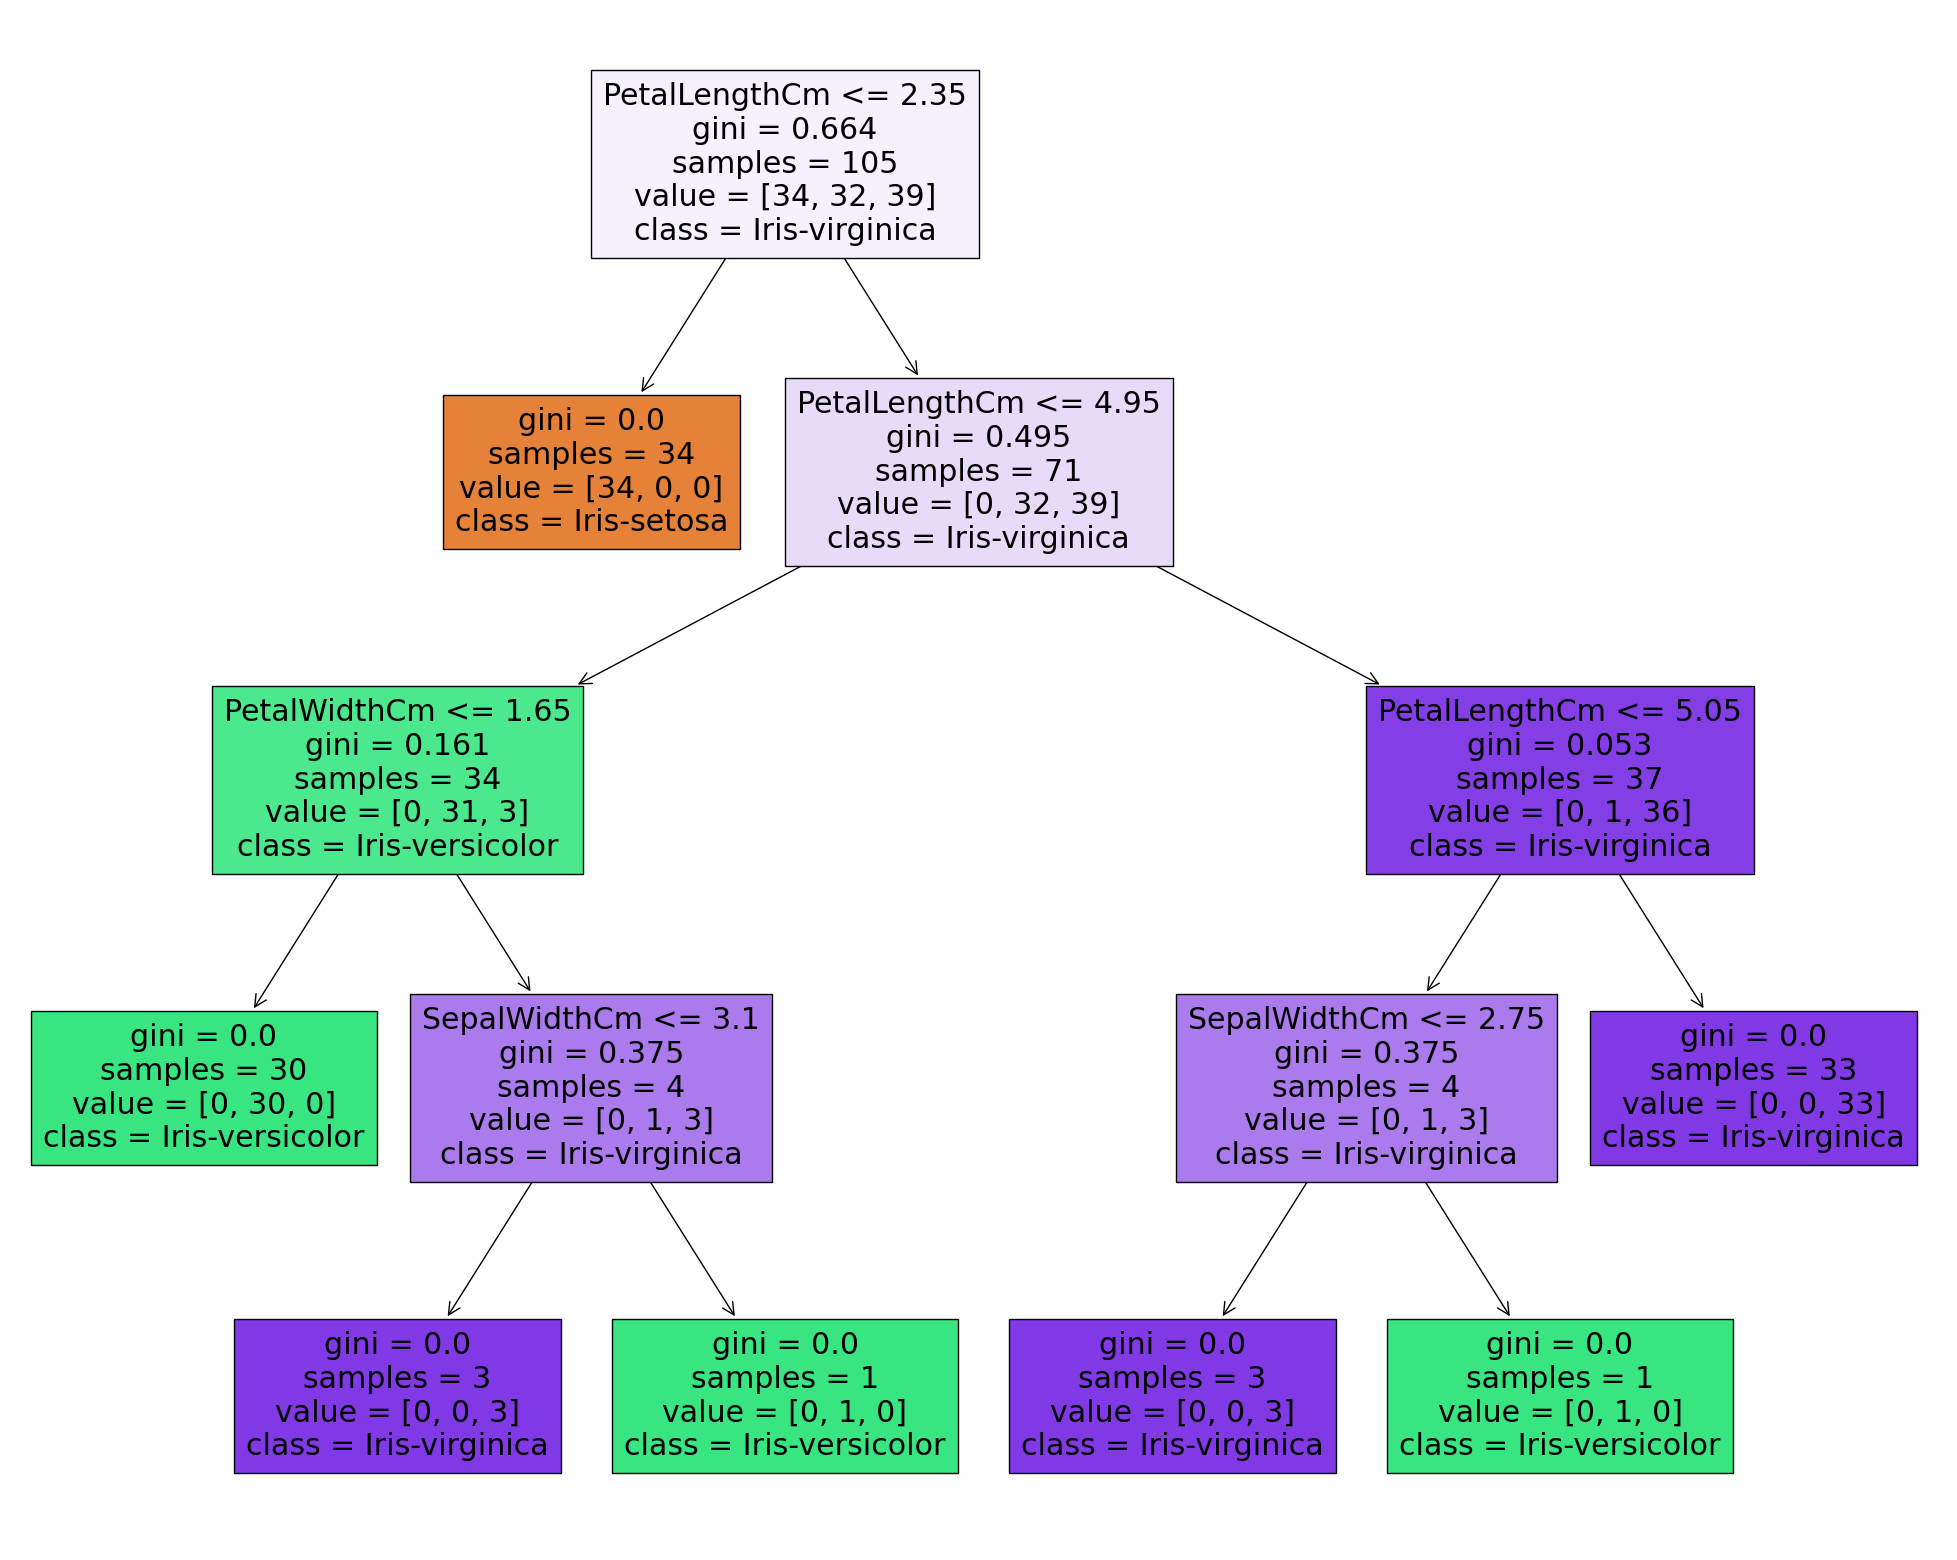

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=model.feature_names_in_,  
                   class_names=model.classes_,
                   filled=True)

In [12]:
fig.savefig("decistion_tree.png")

## 將隨機生成樹應用在手寫數字辨識

In [15]:
# 載入手寫數字的訓練資料
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

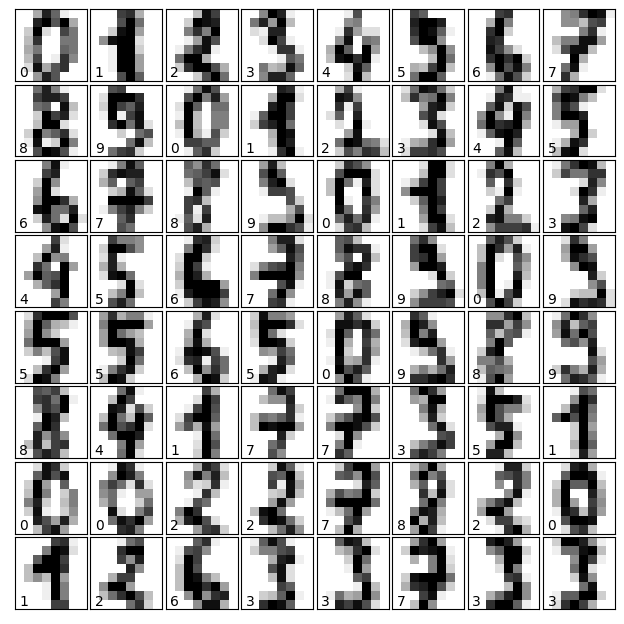

In [16]:
# 將部分的訓練資料畫出來
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [17]:
# 將資料分割成訓練跟測試兩個組別，然後用分別使用隨機生成樹進行訓練跟測試
from sklearn.model_selection  import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [18]:
(ypred == ytest).sum() / ytest.shape[0]

0.9755555555555555

In [19]:
# 訓練與測試的成果
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       0.98      1.00      0.99        51
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



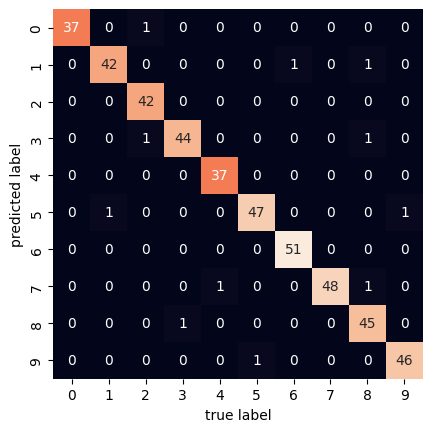

In [20]:
# 測試結果的方陣圖
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 重要參數說明
### [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
* max_depth : int, default=None
* min_samples_split : int or float, default=2
* min_samples_leafint or float, default=1
* max_leaf_nodes : int, default=None

### [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

* n_estimators : int, default=100
* criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
* max_depth : int, default=None
* min_samples_split : int or float, default=2
* min_samples_leafint or float, default=1
* max_leaf_nodes : int, default=None

### [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

* criterion : {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
* max_depth : int, default=None
* min_samples_split : int or float, default=2
* min_samples_leafint or float, default=1
* max_leaf_nodes : int, default=None

### [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

* n_estimators : int, default=100
* criterion{“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
* max_depth : int, default=None
* min_samples_split : int or float, default=2
* min_samples_leafint or float, default=1
* max_leaf_nodes : int, default=None

